# <center>SOCR Height & Weight Dataset Analysis</center>

## Modules

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

## Initialize the dataframe

In [15]:
df = pd.read_excel('SOCR-height-weight.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Index,Height(Inches),Weight(Pounds)
4,NaN,NaN,NaN,NaN,1,65.78331,112.9925


## Data Wrangling

In [16]:
# removing unnecessary rows and columns
df = df.iloc[3:, 5:]

# setting the first row as the column headers
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

df.head()

3,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.2166,142.3354
4,67.78781,144.2971


In [17]:
df.shape

(25000, 2)

In [18]:
df.describe()

3,Height(Inches),Weight(Pounds)
count,25000.00000,25000.0000
unique,24503.00000,24248.0000
top,65.65796,124.7975
freq,3.00000,4.0000


In [20]:
df.dtypes

3
Height(Inches)    object
Weight(Pounds)    object
dtype: object

In [21]:
# converting the columns to numeric datatype
df = df.astype('int')

In [22]:
df.describe()

3,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.493240,126.578320
std,1.923731,11.659936
min,60.000000,78.000000
25%,66.000000,119.000000
50%,67.000000,127.000000
75%,69.000000,134.000000
max,75.000000,170.000000


In [30]:
df.dtypes

3
Height(Inches)    int32
Weight(Pounds)    int32
dtype: object

The data is normally distributed.

## EDA

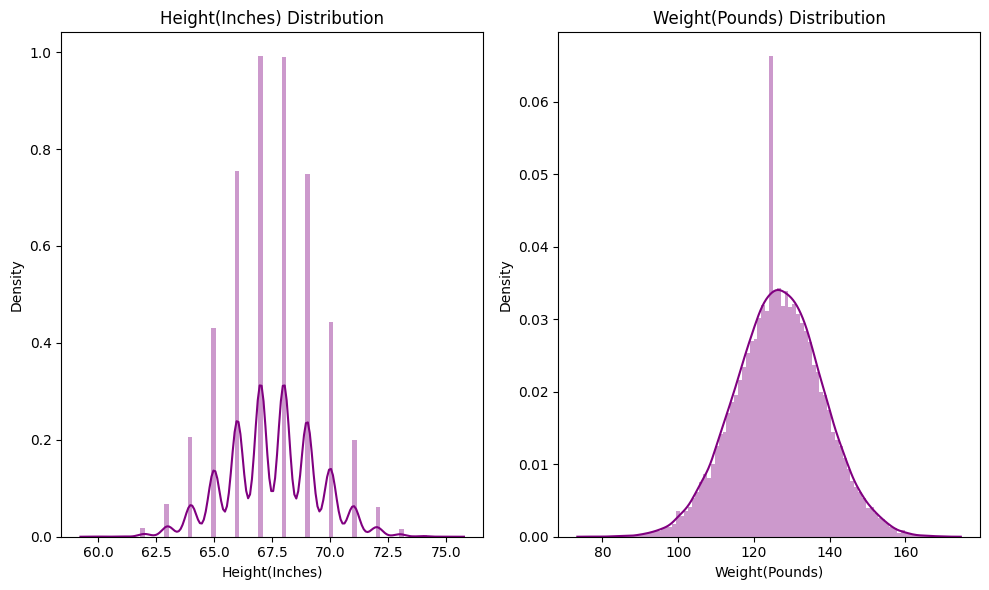

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes = axes.flatten()

for index, feature in enumerate(df.columns):
    ax = axes[index]
    sns.distplot(a=df[feature], color='purple', ax=ax, bins='auto')
    ax.set_title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

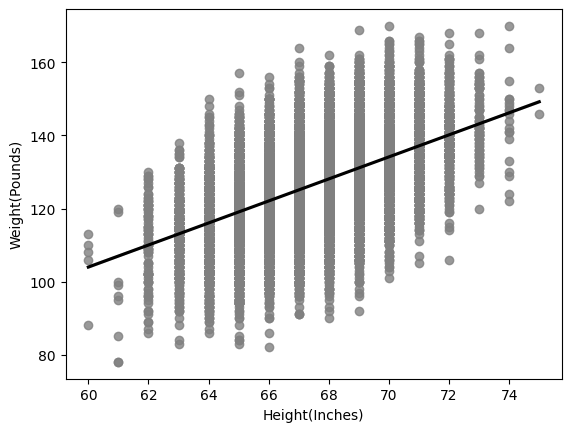

In [48]:
sns.regplot(data=df, x='Height(Inches)', y='Weight(Pounds)', line_kws={'color':'black'}, scatter_kws={'color':'grey'})
plt.show()

<Axes: xlabel='3', ylabel='3'>

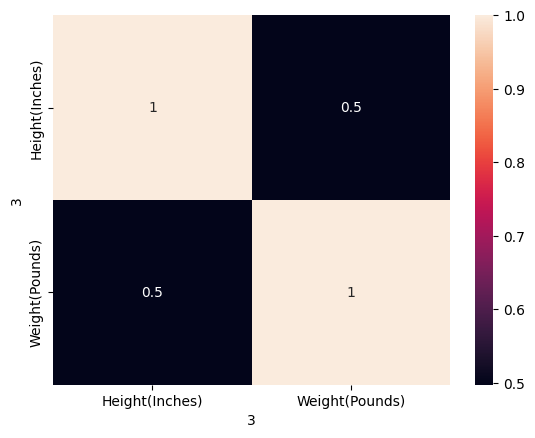

In [49]:
sns.heatmap(df.corr(), annot=True)

## Model Training - Artificial Neural Networks

In [84]:
X = df['Height(Inches)'].values
y = df['Weight(Pounds)'].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=77)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16750,), (8250,), (16750,), (8250,))

In [86]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train.reshape(-1, 1))
X_test = scaler.transform(X_test.reshape(-1, 1))

In [72]:
model = Sequential()

model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=8, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=4, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=2, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [75]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=True)

In [76]:
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
524/524 [==============================] - 1s 3ms/step - loss: 1824.5209 - val_loss: 381.3512
Epoch 2/100
524/524 [==============================] - 2s 3ms/step - loss: 1786.5645 - val_loss: 356.3309
Epoch 3/100
524/524 [==============================] - 1s 3ms/step - loss: 1773.1356 - val_loss: 351.2822
Epoch 4/100
524/524 [==============================] - 1s 3ms/step - loss: 1701.0073 - val_loss: 409.1396
Epoch 5/100
524/524 [==============================] - 1s 3ms/step - loss: 1639.2721 - val_loss: 321.0787
Epoch 6/100
524/524 [==============================] - 1s 3ms/step - loss: 1633.4688 - val_loss: 311.0458
Epoch 7/100
524/524 [==============================] - 1s 3ms/step - loss: 1656.0902 - val_loss: 312.7047
Epoch 8/100
524/524 [==============================] - 1s 3ms/step - loss: 1590.7057 - val_loss: 302.2269
Epoch 9/100
524/524 [==============================] - 2s 3ms/step - loss: 1588.2666 - val_loss: 307.0430
Epoch 10/100
524/524 [========================

Epoch 78/100
524/524 [==============================] - 2s 3ms/step - loss: 867.7474 - val_loss: 191.6834
Epoch 79/100
524/524 [==============================] - 2s 3ms/step - loss: 844.1984 - val_loss: 187.6941
Epoch 80/100
524/524 [==============================] - 2s 3ms/step - loss: 857.9633 - val_loss: 196.2992
Epoch 81/100
524/524 [==============================] - 2s 3ms/step - loss: 842.6186 - val_loss: 187.3379
Epoch 82/100
524/524 [==============================] - 2s 3ms/step - loss: 812.8774 - val_loss: 182.1425
Epoch 83/100
524/524 [==============================] - 1s 3ms/step - loss: 832.0500 - val_loss: 196.4830
Epoch 84/100
524/524 [==============================] - 2s 3ms/step - loss: 797.7036 - val_loss: 182.7471
Epoch 85/100
524/524 [==============================] - 2s 3ms/step - loss: 791.3660 - val_loss: 185.2167
Epoch 86/100
524/524 [==============================] - 2s 3ms/step - loss: 782.8386 - val_loss: 183.6816
Epoch 87/100
524/524 [========================

In [80]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,1824.520874,381.351227
1,1786.564453,356.330933
2,1773.135620,351.282166
3,1701.007324,409.139648
4,1639.272095,321.078735


<Axes: >

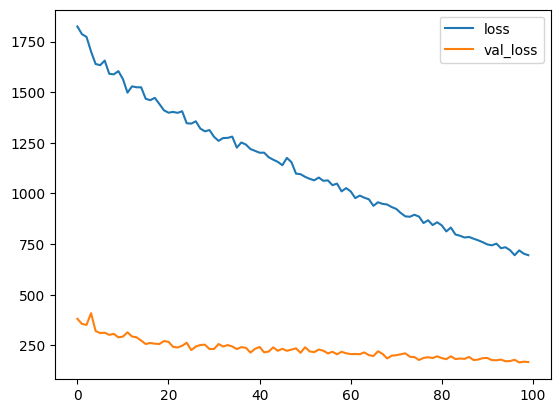

In [81]:
losses.plot()

## Model Training - Regression Algorithms

In [92]:
def predict(alg):
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_name = alg.__name__
    r2 = r2_score(y_test, y_pred)
    
    print(model_name)
    print("Model RMSE:", RMSE, "\t Model R2 score:", r2)
    print()

In [95]:
for model in [LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor]:
    predict(model)

LinearRegression
Model RMSE: 10.133196365333593 	 Model R2 score: 0.2503000193338577

Ridge
Model RMSE: 10.13331293514564 	 Model R2 score: 0.2502827705042967

Lasso
Model RMSE: 11.70399654169072 	 Model R2 score: -0.0001449625701728241

ElasticNet
Model RMSE: 11.67422669682012 	 Model R2 score: 0.004936428912014068

RandomForestRegressor
Model RMSE: 10.132792594691757 	 Model R2 score: 0.2503597637226147



:(  
One of the worst models i have ever created !